# Module 6 Peer Review Assignment

# Problem 1

Suppose $X$ and $Y$ are independent normal random variables with the same mean $\mu$ and the same variance $\sigma^2$. Do the random variables $W = X + Y$ and $U=2X$ have the same distribution? Explain.

No,  
E(W) = E(X) + E(Y) = 2𝜇  
Var(W) = Var(X) + Var(Y) = 𝜎<sup>2</sup> + 𝜎<sup>2</sup> = 2𝜎<sup>2</sup>  
<strong>W ~ N(2𝜇, 2𝜎<sup>2</sup>)</strong>  
<br/> 
E(V) = E(2x) = 2(E(X) = 2𝜇  
Var(V) = Var(2X) + Var(Y) = 𝜎<sup>2</sup> + 𝜎<sup>2</sup> = 2𝜎<sup>2</sup>  
<strong>V ~ N(2𝜇, 4𝜎<sup>2</sup>)</strong>

# Problem 2: Central Limit Theorem and Simulation

**a)** For this problem, we will be sampling from the Uniform distribution with bounds [0, 100]. Before we simulate anything, let's make sure we understand what values to expect. If $X \sim U(0, 100)$, what is $E[X]$ and $Var(X)$?

- E(X) = (a+b)/2 = (0+100)/2 = 50
<br/>
<br/>
- Var(X) = (b-a)<sup>2</sup>/12 = 10,000/12 = 833.33

**b)** In real life, if we want to estimate the mean of a population, we have to draw a sample from that population and compute the sample mean. The important questions we have to ask are things like:

* Is the sample mean a good approximation of the population mean?
* How large does my sample need to be in order for the sample mean to well-approximate the population mean?

Complete the following function to sample $n$ rows from the $U(0, 100)$ distribution and return the sample mean. Start with a sample size of 10 and draw a sample mean from your function. Is the estimated mean a good approximation for the population mean we computed above? What if you increase the sample size?

In [48]:
uniform.sample.mean = function(n){
    
    samples = runif(n, 0, 100)
    sample.mean = mean(samples)
    return(sample.mean)
}

uniform.sample.mean(10)

[1] 49.47968

In [49]:
uniform.sample.mean(100)

[1] 52.9539

In [50]:
uniform.sample.mean(1000)

[1] 48.84168

In [51]:
uniform.sample.mean(10000)

[1] 50.07162

The sample mean is as close to the population mean as how large is the sameple mean. That is, the more samples you draw, the closer the approximation will be.

Typically, n > 30 is considered a sufficiently large enough sample size.

**c)** Notice, for a sample size of $n$, our function is returning an estimator of the form

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i 
$$

That means, if each $X_i$ is a random variable, then our sample mean is also a random variable with its own distribution. We call this disribution the sample distribution. Let's take a look at what this distribution looks like.  

Using the `uniform.sample.mean` function, simulate $m=1000$ sample means, each from a sample of size $n=10$. Create a histogram of these sample means. Then increase the value of $n$ and plot the histogram of those sample means. What do you notice about the distribution of $\bar{X}$? What is the mean $\mu$ and variance $\sigma^2$ of the sample distribution?

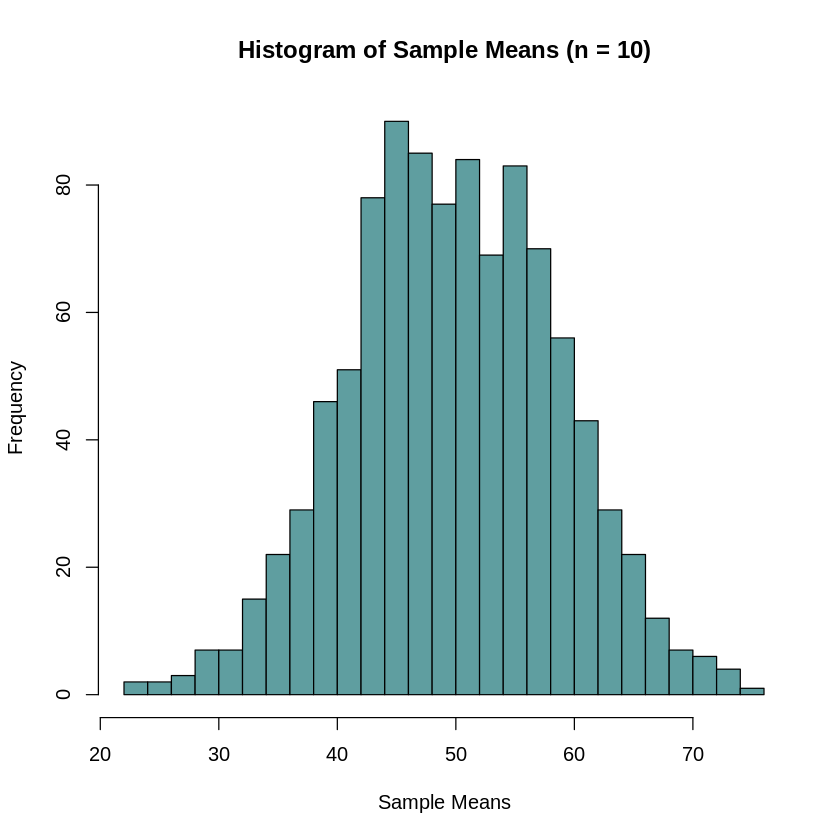

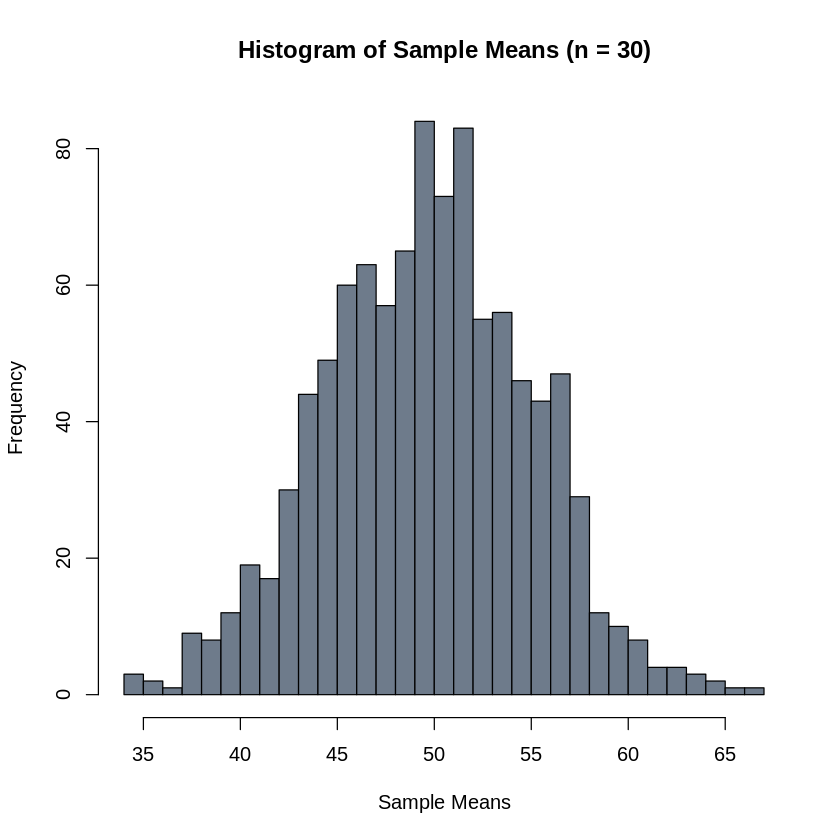

In [52]:
# Function to generate sample means from a uniform distribution
uniform.sample.mean <- function(n){
    x <- runif(n, 0, 100)
    mean(x)
}

set.seed(123) # Set seed for reproducibility
n <- 10
m <- 1000
sample_means <- replicate(m, uniform.sample.mean(n))
hist(sample_means, 
     breaks = 30, 
     main = "Histogram of Sample Means (n = 10)", 
     xlab = "Sample Means",
     col = "cadetblue")

n <- 30
sample_means <- replicate(m, uniform.sample.mean(n))
hist(sample_means, 
     breaks = 30, 
     main = "Histogram of Sample Means (n = 30)", 
     xlab = "Sample Means",
     col = "lightsteelblue4")

These graphs show that once we increase the sample size, the distribution of the sample means becomes narrower and taller, and approaches a normal distribution.

The mean of the sample distibution is equal to the population mean, which in this case is 50.

Var(x) = (100-0)^2 / 12 = 833.33
Var(X-bar) = Var(x) / n = 83.33 / n

**d)** Recall that our underlying population distribution is $U(0, 100)$. Try changing the underlying distribution (For example a binomial(10, 0.5)) and check the sample distribution. Be sure to explain what you notice.

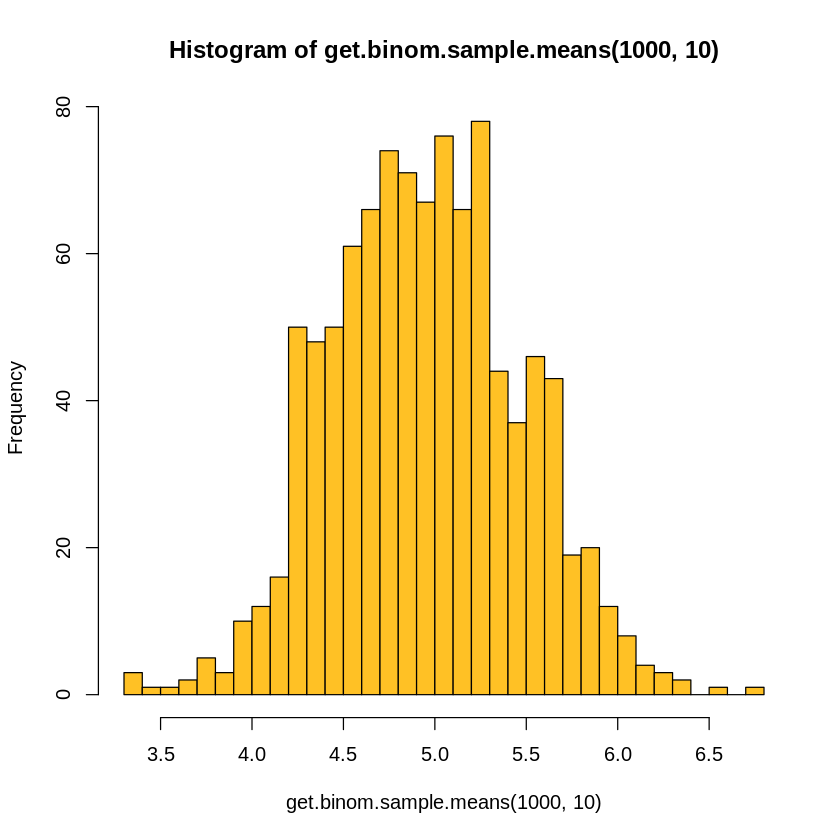

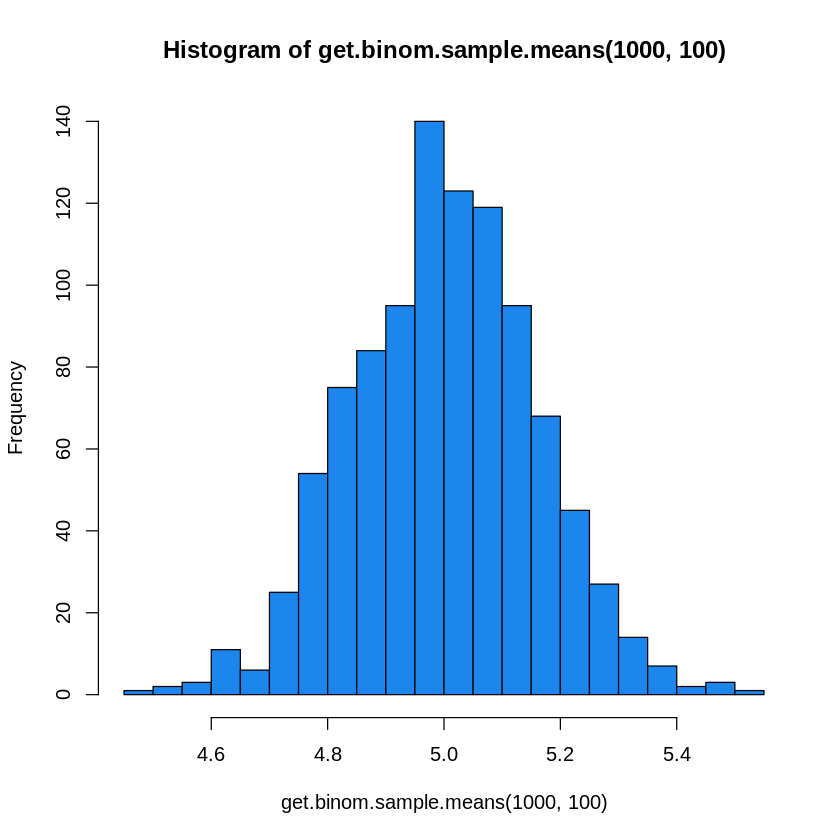

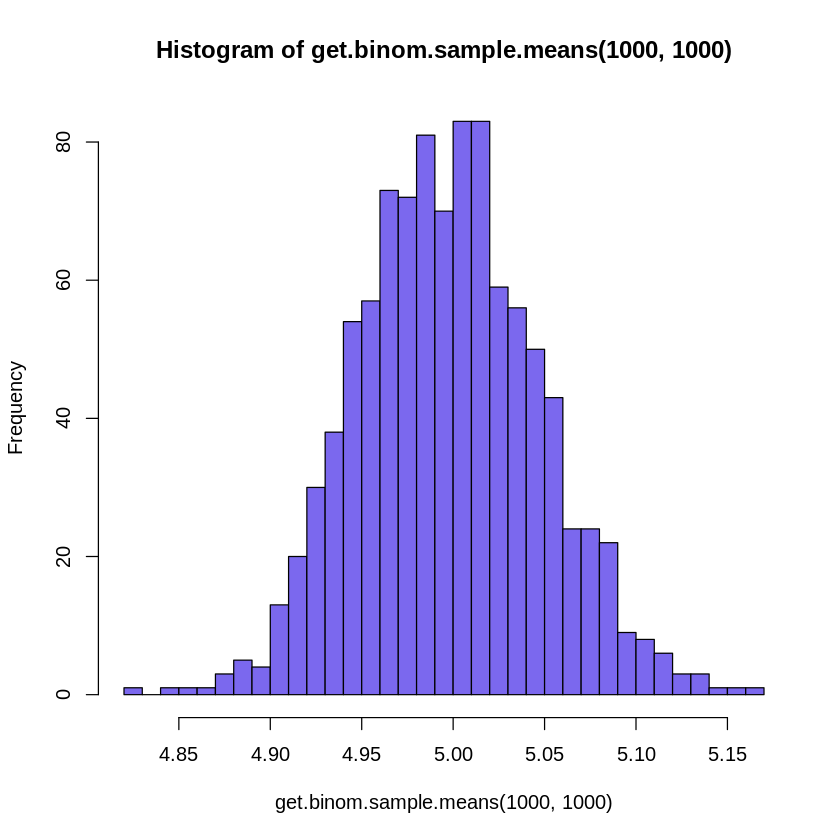

In [53]:
binomial.sample.mean <- function(n){
    samples <- rbinom(n, 10, 0.5)
    sample.mean <- mean(samples)
    return(sample.mean)
}

get.binom.sample.means <- function(m, n){
    means <- numeric(m)
    for (i in 1:m){
        means[i] <- binomial.sample.mean(n)
    }
    return(means)
}

hist(get.binom.sample.means(1000, 10), breaks = 30, col = "goldenrod1")
hist(get.binom.sample.means(1000, 100), breaks = 30, col = "dodgerblue2")
hist(get.binom.sample.means(1000, 1000), breaks = 30, col = "mediumslateblue")

YOUR ANSWER HERE

# Problem 3

Let $X$ be a random variable for the face value of a fair $d$-sided die after a single roll. $X$ follows a discrete uniform distribution of the form $\textrm{unif}\{1,d\}$. Below is the mean and variance of $\textrm{unif}\{1,d\}$.

$$ E[X] = \dfrac{1+d}{2} \qquad Var(X) = \dfrac{(d- 1 + 1)^2 - 1}{12}$$

**a)** Let $\bar{X}_n$ be the random variable for the mean of $n$ die rolls. Based on the Central Limit Theorem, what distribution does $\bar{X}_n$ follow when $d=6$.

YOUR ANSWER HERE

**b)** Generate $n=1000$ die values, with $d=6$. Calculate the running average of your die rolls. In other words, create an array $r$ such that:

$$ r[j] = \sum_{i=1}^j \dfrac{X_i}{j} $$

Finally, plot your running average per the number of iterations. What do you notice?

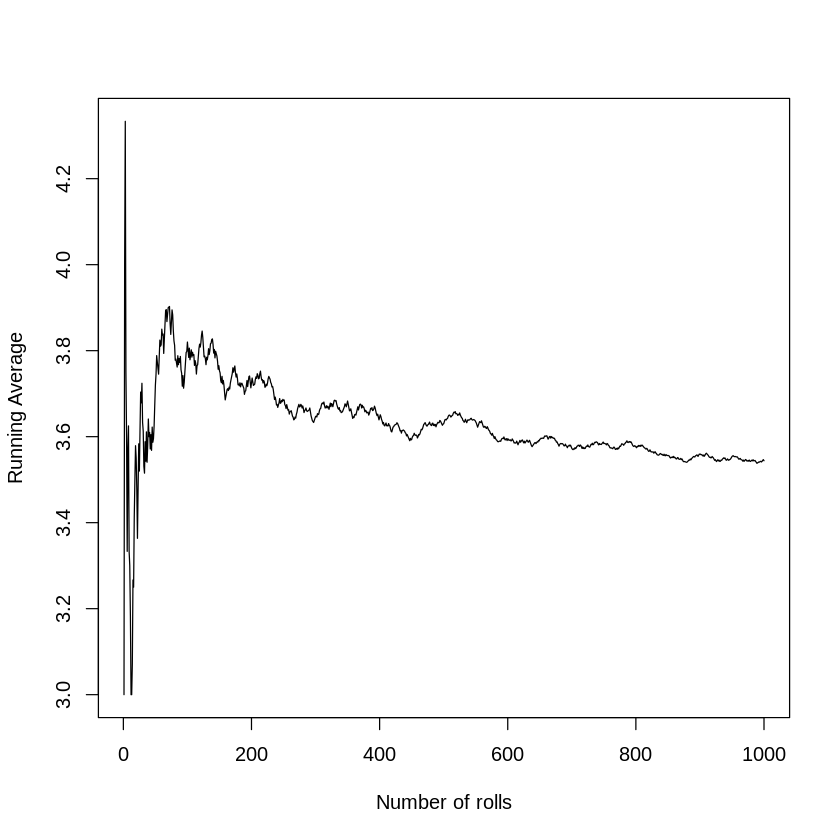

In [54]:
n <- 1000
d <- 6
die_rolls <- sample(1:d, n, replace = TRUE)

running_average <- cumsum(die_rolls) / seq_along(die_rolls)

plot(running_average, type='l', xlab = "Number of rolls", ylab = "Running Average")

The running average of the die rolls looks to converge to the expected value of the distribution (3.5)